In [53]:
import os
import config

In [54]:
import numpy as np
import matplotlib.pylab as plt
from math import *
#from sklearn.models import train_test_split
from sklearn.metrics import mean_squared_error as mse
from sklearn import svm
import pandas as pd
import seaborn as sns
from pylab import rcParams
from matplotlib import rc
from mpl_toolkits.mplot3d import Axes3D
import time
%matplotlib notebook

In [55]:
%matplotlib inline
%config InlineBackend.figure_format='retina'
RANDOM_SEED = 42
sns.set(style='whitegrid', palette='muted', font_scale=1.2)
HAPPY_COLORS_PALETTE = ['#01BEFE', '#FFDD00', '#FF7D00', '#FF006D', '#ADFF02', '#8F00FF']
sns.set_palette(sns.color_palette(HAPPY_COLORS_PALETTE))
rcParams['figure.figsize'] = 10, 5


In [56]:
import warnings
warnings.filterwarnings('ignore')

In [57]:
from processing import create_features

In [58]:
from statsmodels.tsa.stattools import pacf, acf
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
from sklearn.feature_selection import mutual_info_regression, SelectKBest

In [59]:
def extract_and_select_features(arr, orig_features, new_features=5):
    X, y = create_features(arr, orig_features)
    fs = SelectKBest(score_func=mutual_info_regression, k = new_features)
    fs.fit(X, y)
    Xfs = fs.transform(X)
    return Xfs, y

#### April Dataset

In [60]:
df = pd.read_csv('inputs/DS1_1440.csv')

In [61]:
df

,date,wind_speed
0,2015-04-01 00:00:00,7.07905
1,2015-04-01 00:30:00,7.03170
2,2015-04-01 01:00:00,7.07125
3,2015-04-01 01:30:00,7.42920
4,2015-04-01 02:00:00,6.88420
...,...,...
1435,2015-04-30 21:30:00,9.73170
1436,2015-04-30 22:00:00,10.40910
1437,2015-04-30 22:30:00,10.38510
1438,2015-04-30 23:00:00,9.30260


In [62]:
df.shape

(1440, 2)

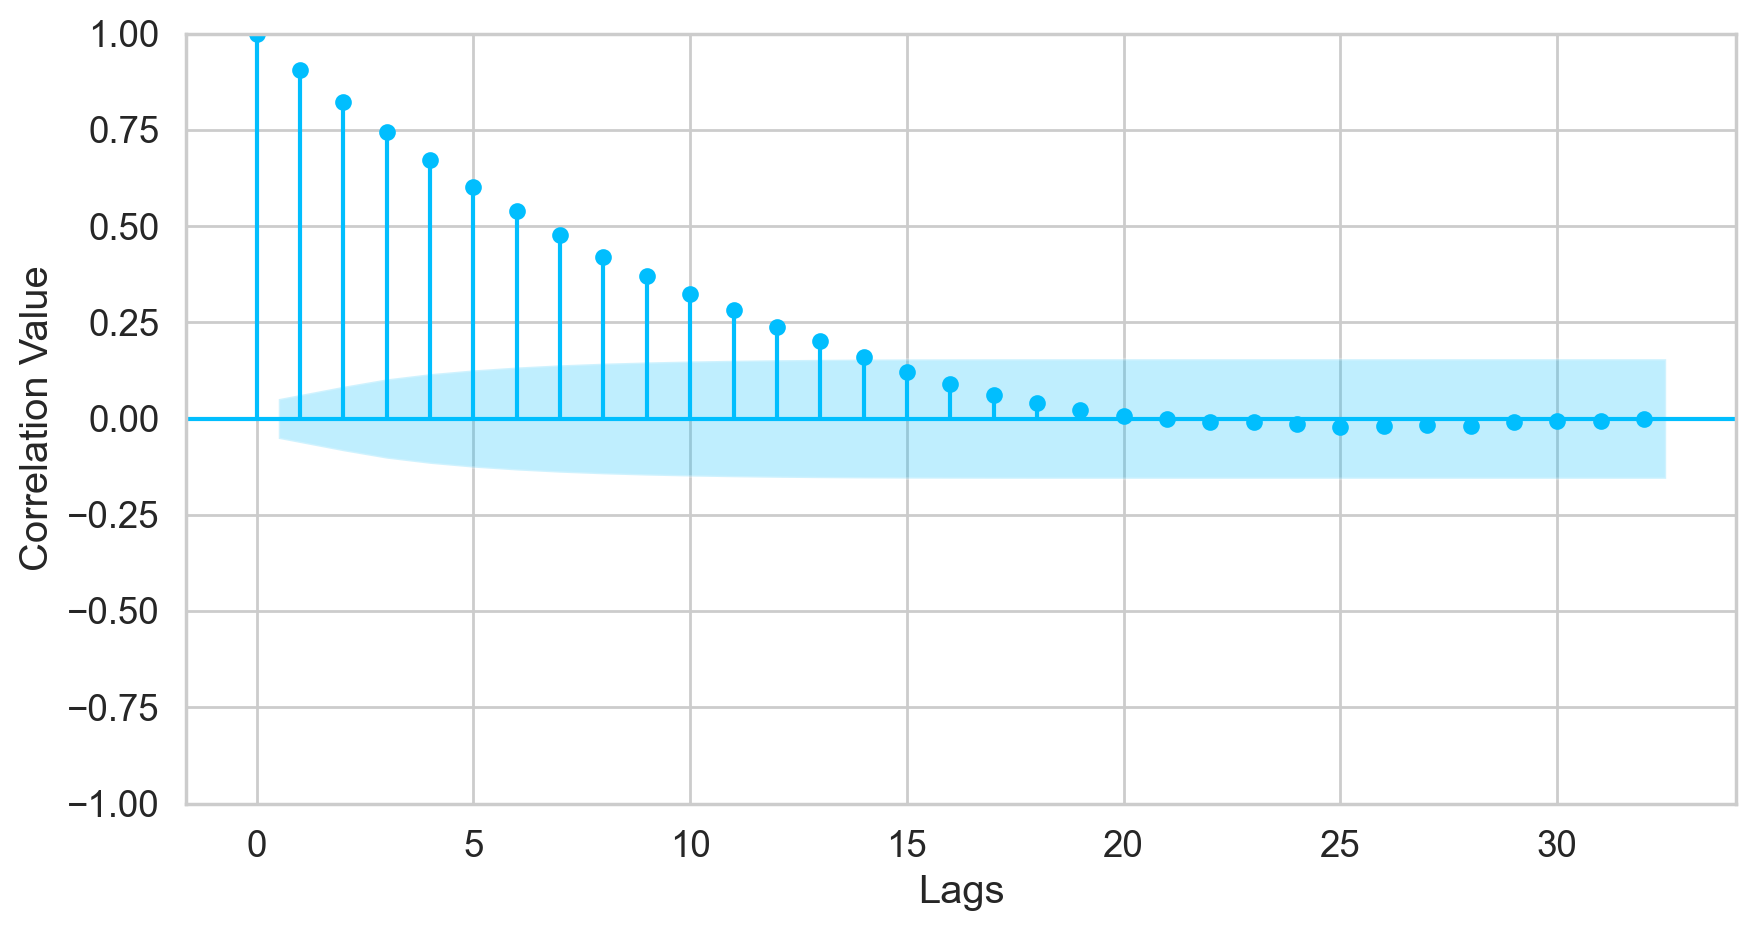

In [63]:
plot_acf(df['wind_speed'], title=None)
plt.xlabel('Lags')
plt.ylabel('Correlation Value')
plt.savefig(os.path.join(config.FIGURES_PATH, 'acf_1.png'), dpi=300)

In [64]:
X, y = extract_and_select_features(df.wind_speed.values, 14)

In [65]:
X.shape, y.shape

((1426, 5), (1426,))

In [66]:
from sklearn.preprocessing import MinMaxScaler

In [67]:
scaler = MinMaxScaler()

In [68]:
Xsc = scaler.fit_transform(X)

In [69]:
Xsc

array([[0.49004743, 0.45167886, 0.4422024 , 0.46166551, 0.52817868],
       [0.45167886, 0.4422024 , 0.46166551, 0.52817868, 0.49583374],
       [0.4422024 , 0.46166551, 0.52817868, 0.49583374, 0.51617886],
       ...,
       [0.69939552, 0.63350332, 0.70277317, 0.68884328, 0.74242713],
       [0.63350332, 0.70277317, 0.68884328, 0.74242713, 0.74052874],
       [0.70277317, 0.68884328, 0.74242713, 0.74052874, 0.65490049]])

In [70]:
Xy = np.concatenate([Xsc, y.reshape(-1, 1)], axis=1)

In [71]:
Xy.shape

(1426, 6)

In [72]:
pd.DataFrame(Xy, columns=['t-'+str(i) for i in range(Xy.shape[1]-1, 0, -1)] + ['t']).to_csv(
    os.path.join(config.INPUT_PATH, 'preprocessed_april_data.csv'), index=False
)

In [73]:
import pickle

In [74]:
file = open('models/scaler_1', 'ab')
pickle.dump(scaler, file)
file.close()

#### May Dataset

In [37]:
df = pd.read_csv('inputs/DS2_1448.csv')

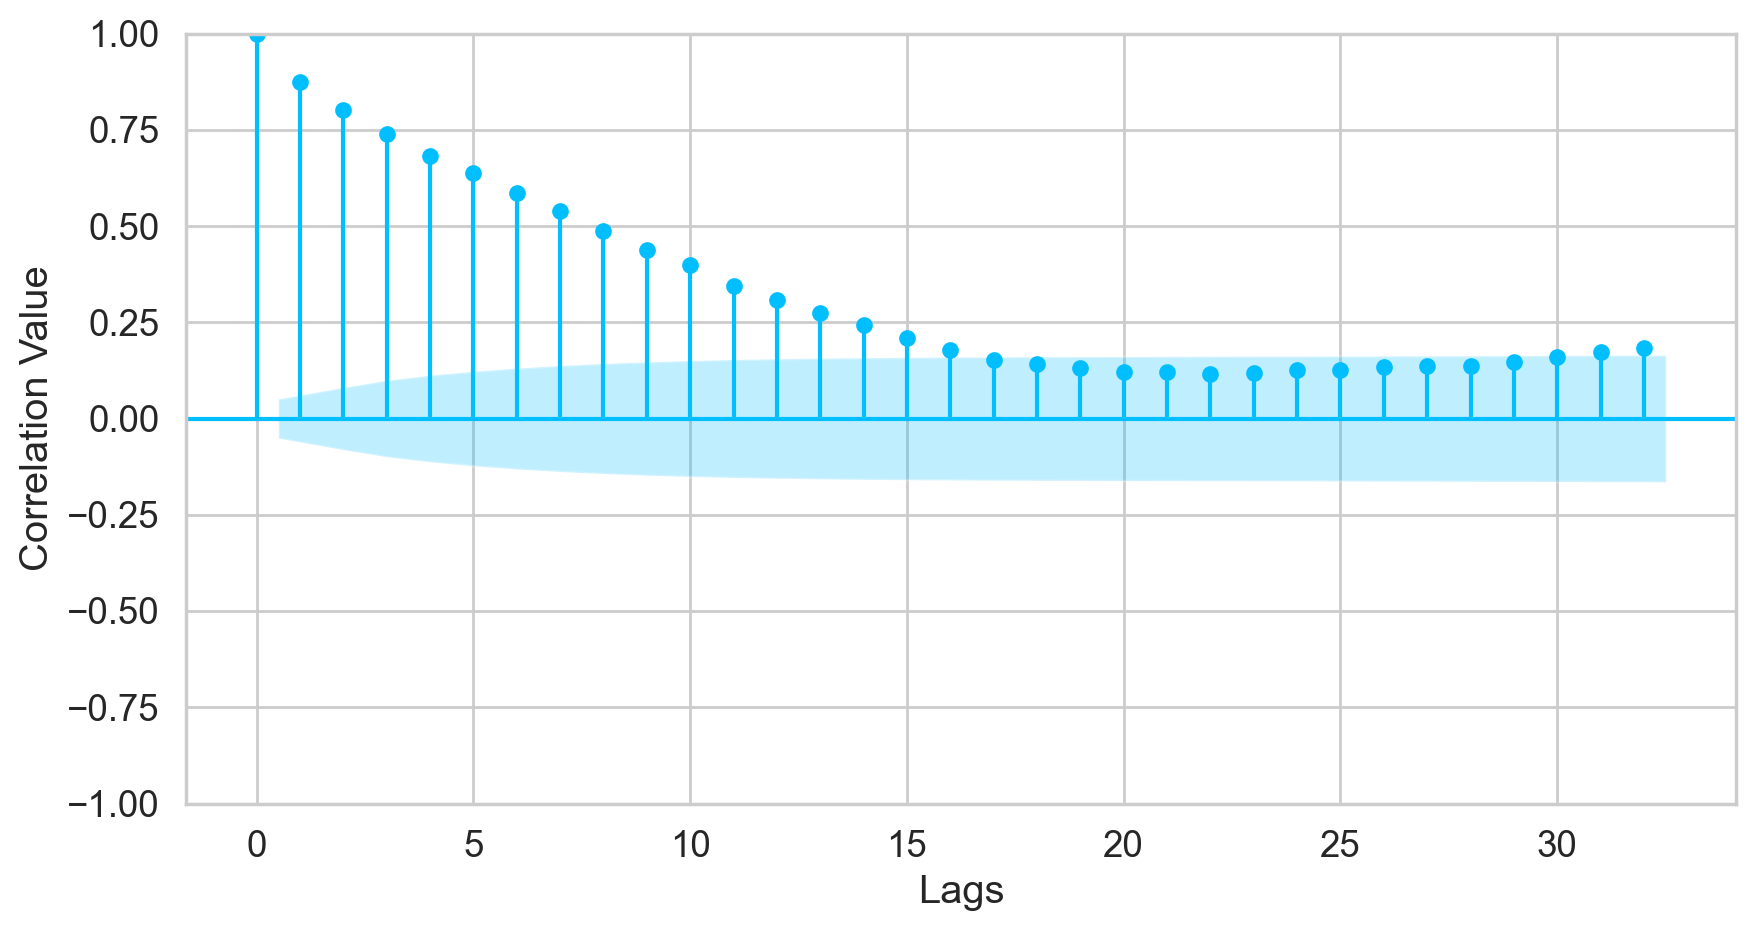

In [38]:
plot_acf(df['wind_speed'], title=None)
plt.xlabel('Lags')
plt.ylabel('Correlation Value')
plt.savefig(os.path.join(config.FIGURES_PATH, 'acf_2.png'), dpi=300)

In [45]:
X, y = extract_and_select_features(df.wind_speed.values, 16)

In [46]:
X.shape, y.shape

((1472, 5), (1472,))

In [47]:
scaler = MinMaxScaler()
Xsc = scaler.fit_transform(X)

In [48]:
Xsc.shape

(1472, 5)

In [49]:
Xy = np.concatenate([Xsc, y.reshape(-1, 1)], axis=1)

In [51]:
pd.DataFrame(Xy, columns=['t-'+str(i) for i in range(Xy.shape[1]-1, 0, -1)] + ['t']).to_csv(
    os.path.join(config.INPUT_PATH, 'preprocessed_may_data.csv'), index=False
)

In [52]:
file = open('models/scaler_2', 'ab')
pickle.dump(scaler, file)
file.close()